In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Import the backer_info.csv file into a DataFrame.
emission_data=r'C:\Users\Violet.Huang\Documents\14_Berkerly bootscamp\Module21\GCB2022v27_MtCO2_flat.csv'
df = pd.read_csv(emission_data)
#display
df.head(10)


,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['Country', 'ISO 3166-1 alpha-3', 'Year', 'Total', 'Coal', 'Oil', 'Gas',
       'Cement', 'Flaring', 'Other', 'Per Capita'],
      dtype='object')

In [4]:
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [5]:
df['Country']= df['Country'].astype('str') 
#df['ISO 3166-1 alpha-3 '] = df['ISO 3166-1 alpha-3 '].astype(str)
df.dtypes

Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

In [6]:
# selecting rows based on"gloable", use lot method to retrieve the data
df_global = df.loc[(df['Country']=='Global')]
df_global                            

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739280,14506.973810,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830690,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558970,14725.978030,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085730,14174.564010,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


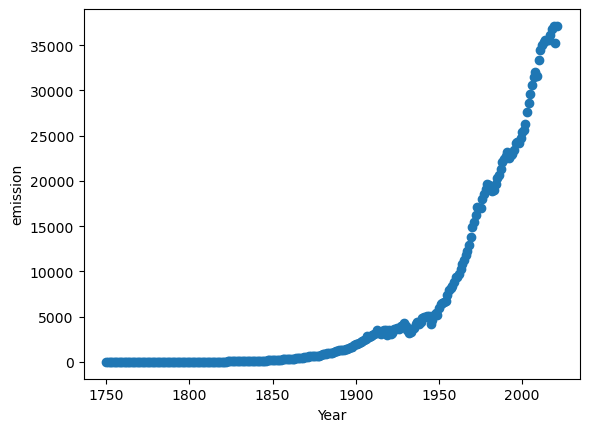

In [7]:
# trend of annual total global emissions
plt.scatter(df_global.Year,df_global.Total)
plt.xlabel('Year')
plt.ylabel('emission')
plt.show()

In [8]:
# save the global dataset
# df_global.to_csv(r'C:\Users\Violet.Huang\Documents\14_Berkerly bootscamp\Module21\global.csv')

In [9]:
# selecting the year after 2000
df_global_2000 = df.loc[(df['Country']=='Global')& (df['Year'] >= 2000)]
df_global_2000.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63082,Global,WLD,2000,25453.62214,9203.117603,10302.09059,4731.291034,721.927315,278.928472,216.267121,4.139541
63083,Global,WLD,2001,25668.04833,9255.256797,10390.66898,4773.584851,754.331663,281.128017,213.078023,4.119578
63084,Global,WLD,2002,26281.03747,9678.959137,10385.86418,4905.853640,796.052479,298.553835,215.754196,4.163394
63085,Global,WLD,2003,27651.59645,10518.463640,10679.65445,5081.468111,852.252693,299.375515,220.382043,4.324685
63086,Global,WLD,2004,28636.69504,10871.584340,11042.50463,5257.190057,910.566319,323.802545,231.047147,4.422142
63087,Global,WLD,2005,29614.60226,11543.334880,11139.39918,5380.665522,964.306101,345.094230,241.802350,4.515677
63088,Global,WLD,2006,30593.11679,12188.840280,11246.32155,5506.809201,1051.668722,346.860142,252.616896,4.606415
63089,Global,WLD,2007,31506.78920,12776.360250,11283.66534,5694.133805,1129.389392,363.985324,259.255090,4.684364
63090,Global,WLD,2008,32085.83632,13192.796640,11251.32508,5864.291234,1143.738362,374.074157,259.610844,4.710472
63091,Global,WLD,2009,31564.03069,13016.428000,10996.94868,5751.954007,1175.729621,379.401924,243.568467,4.575621


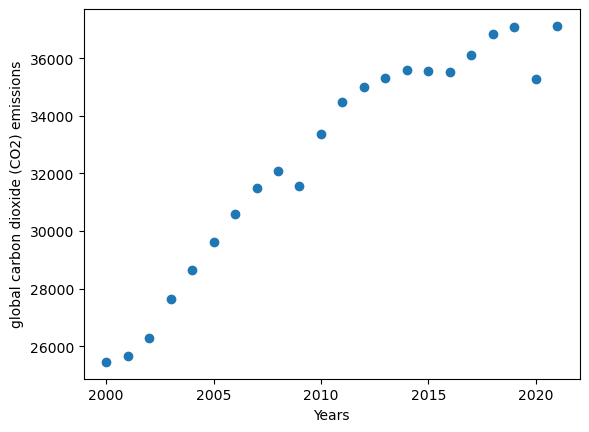

In [10]:
# plot of annual total global emissions after 2000
plt.scatter(df_global_2000.Year	, df_global_2000.Total)
plt.xlabel('Years')
plt.ylabel('global carbon dioxide (CO2) emissions')
plt.show()

In [11]:
# Remove the "Country","ISO 3166-1 alpha-3'" columns because object 
df_global_2000 = df_global_2000.drop('Country', axis=1)
df_global_2000 = df_global_2000.drop('ISO 3166-1 alpha-3', axis=1)


In [12]:
#supervised learning regression 
year_df = df_global_2000.Year
X = year_df.values.reshape(-1, 1)
X[:5]
X.shape

(22, 1)

In [13]:
y = df_global_2000.Total
model = LinearRegression()
model.fit(X,y)


LinearRegression()

In [14]:
y_pred = model.predict(X)
print(y_pred.shape)

(22,)


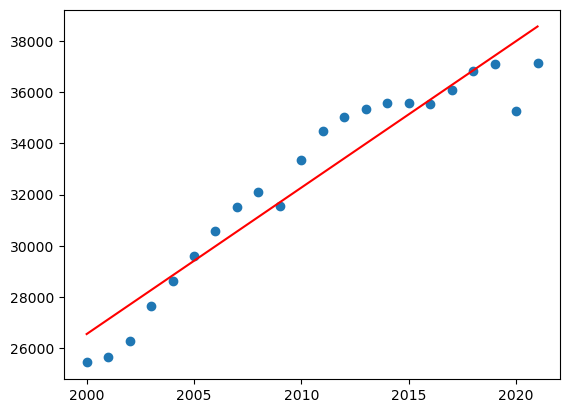

In [15]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [16]:
# predict future year ( use the dictionay to save the year and the key value pair)
future_years = [2030, 2040, 2050, 2100]
future_years_pred = dict()
for year in future_years:
    df = pd.DataFrame()
    df['Year'] = [year]
    df = df.values.reshape(-1, 1)
    pred = model.predict(df)
    # print(pred)
    future_years_pred[year] = pred

In [17]:
# summary of future year prediction
print("##### Predicted future results by our model #####\n")
for k,v in future_years_pred.items():
    print("Year %s, predicted emission:%.2f" % (k, v))
    
print("\nAccording to the Paris Accord, the target global emission level is 37000mt, which is an increase of only 11% of 2010 level.")
print("Our model predict that without course change, we will emit %.2fmt of co2 in the year of 2030, far exceeding the target." % (future_years_pred[2030]))

##### Predicted future results by our model #####

Year 2030, predicted emission:43695.11
Year 2040, predicted emission:49406.21
Year 2050, predicted emission:55117.30
Year 2100, predicted emission:83672.80

According to the Paris Accord, the target global emission level is 37000mt, which is an increase of only 11% of 2010 level.
Our model predict that without course change, we will emit 43695.11mt of co2 in the year of 2030, far exceeding the target.
